In [1]:
import pytesseract as pt

In [2]:
from PIL import Image

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import tensorflow as tf

In [6]:
sess=tf.Session()

In [7]:
def binarizing(img,threshold):
    img=img.convert('L')
    pixdata=img.load()
    w,h=img.size
    for y in range(h):
        for x in range(w):
            if pixdata[x,y]<threshold:
                pixdata[x,y]=0
            else:
                pixdata[x,y]=255
    return img

In [8]:
def get_code(img):
    a=plt.imread(img)
    b=(a[:,:,0]>60) & (a[:,:,1]<15) & (a[:,:,2]<15)
    plt.imsave('yanzhengma2.jpg',b)
    tf_data=plt.imread('yanzhengma2.jpg')
    tf_data=tf_data[np.newaxis,:,:,:]
    pooled=tf.nn.max_pool(tf_data,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    img_pooled=sess.run(pooled)
    plt.imsave('final.jpg',img_pooled[0,:,:,:])
    c=Image.open('final.jpg')
    d=c.convert('L')
    code=pt.image_to_string(d)
    return code

In [25]:
get_code('yanzheng.jpg')

''

In [20]:
a=plt.imread('yanzheng.jpg')                         ########下面是截屏验证码部分

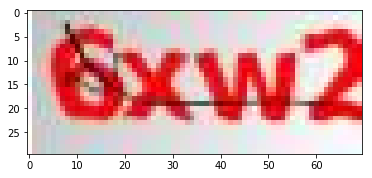

In [26]:
plt.imshow(a)

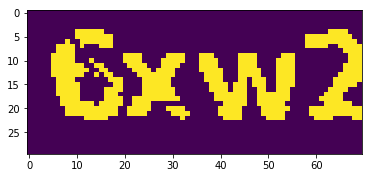

In [41]:
plt.imshow((a[:,:,0]>150) & (a[:,:,1]<100) & (a[:,:,2]<100))    #######这个参数是对应截屏验证码的

In [76]:
b=(a[:,:,0]>150) & (a[:,:,1]<100) & (a[:,:,2]<100)

In [77]:
plt.imsave('yanzhengma2.jpg',b)

In [80]:
c2=Image.open('yanzhengma2.jpg')

In [82]:
d2=c2.convert('L')
d2

In [83]:
pt.image_to_string(d2)              #######验证码截屏部分结束，使用截屏图片不需要用tf进行池化

'6xw2'

In [70]:
plt.imsave('final.jpg',img_pooled[0,:,:,:])

In [71]:
c=Image.open('final.jpg')
c

In [72]:
d=c.convert('L')
d

In [73]:
pt.image_to_string(d)

'6xw2'

In [74]:
f=binarizing(d,100)
f

In [75]:
pt.image_to_string(f)

'6xw2'